In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [5]:
sector=pd.read_csv("data/sectors.csv")
data=pd.read_csv("data/datafest2018.csv")

In [9]:
merge=pd.merge(data, sector, left_on="normTitleCategory", right_on="industry_name")

In [14]:
merge.head()

date     companyId       jobId country stateProvince  \
0  2016-10-01  company00000  job0000000      US            TX   
1  2016-10-01  company00005  job0000005      US            NV   
2  2016-10-01  company00018  job0000018      CA            BC   
3  2016-10-01  company00023  job0000023      DE            SN   
4  2016-10-01  company00035  job0000035      US            TN   

                city  avgOverallRating  numReviews industry  \
0  Dallas-Fort Worth               0.0         NaN      NaN   
1          Las Vegas               3.9       114.0      NaN   
2          Vancouver               0.0         NaN      NaN   
3           Chemnitz               0.0         NaN      NaN   
4            Jackson               0.0         NaN      NaN   

                      normTitle   ...    salaryCurrency  jobLanguage  \
0              home health aide   ...               NaN           EN   
1               nursing student   ...               NaN           EN   
2  registered nurse - endoscopy   ...               CAD           EN   
3                  altenpfleger   ...               NaN           DE   
4              registered nurse   ...               NaN           EN   

   supervisingJob  licenseRequiredJob  educationRequirement jobAgeDays clicks  \
0             0.0                 1.0                  None         97     18   
1             0.0                 1.0      Higher education         81     10   
2             0.0                 1.0                  None         63      8   
3             NaN                 NaN                   NaN         50     18   
4             0.0                 1.0      Higher education         39     22   

   localClicks  industry_name   sector  
0            2       mednurse  medical  
1            3       mednurse  medical  
2            2       mednurse  medical  
3            1       mednurse  medical  
4           13       mednurse  medical  

[5 rows x 25 columns]

In [19]:
medical=merge[merge["sector"]=="medical"]

In [40]:
medical=medical[medical["country"]=="US"]

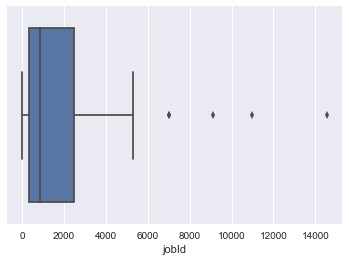

In [31]:
sns.boxplot(medical.groupby("stateProvince")["jobId"].nunique())

In [48]:
medJobs=medical.groupby("stateProvince")["jobId"].nunique()

In [44]:
medJobs.index

Index(['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UM', 'UNKNOWN', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object', name='stateProvince')

In [56]:
medJobs=medJobs.drop(["AS", "UNKNOWN", "PR", "GU", "MP", "UM", "VI"])

C:\Users\slee7268\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


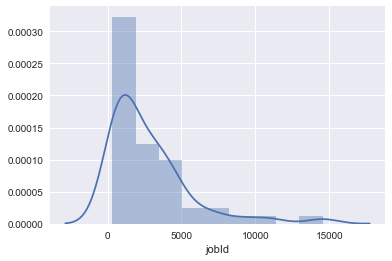

In [60]:
sns.distplot(medJobs)